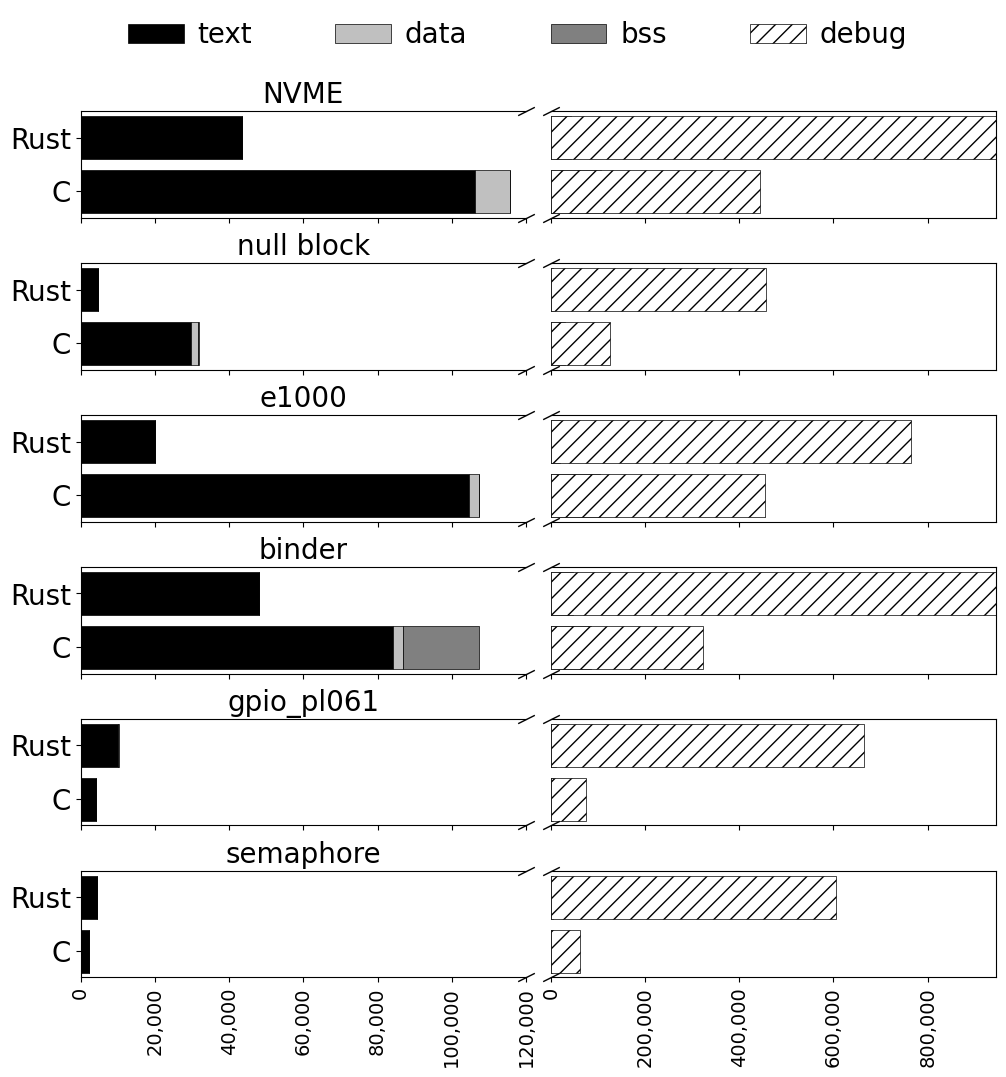

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

bar_conf = dict(edgecolor='black', linewidth=0.5)

once_legend = 0
def comma_formatter(x, pos):
    return '{:,.0f}'.format(x)

data = "43540/72566+33753         &  0/8604+757    &   40/84+15    &    290991/203410+94710              &    385510/88427+58087       &    37633/0                     &    231179/0        &    26.609/32.888 &\
  4579/29646                &  16/1956       &   10/279      &    107126/80078                     &    199426/45836             &    32992/0                     &    116277/0        &    5.420/7.056 &\
 19914/104721              &  0/2564        &   16/64       &    233886/358613                    &    303755/96936             &    22288/0                     &    204045/0        &    7.798/46.948 &\
  48045/84286               &  8/2675        &   24/20318    &    401422/126699+43296+47551        &    466822/47377+26141+31432 &    58507/0                     &    244866/0        &    9.002/9.418 &\
  10170/4020                &  0/200         &   16/0        &    179053/36617                     &    277211/38302             &    17446/0                     &    191690/0        &    8.251/7.378 &\
4447/2285                 &  0/16          &   11/10       &    179053/36617                     &    238587/25303             &    178360/0                    &    8704/0          &    18.496/19.496"
data = data.split('&')
rust = []
c = []
for d in data:
    d = d.strip().split('/')
    rust.append(eval(d[0]))
    c.append(eval(d[1]))

rust = np.array(rust).reshape(6,8)[:,:7]
c = np.array(c).reshape(6,8)[:,:7]
rust_column = np.sum(rust[:,3:7], axis=1)
c_column = np.sum(c[:,3:7], axis=1)
rust = np.column_stack((rust[:,:3], rust_column))
c = np.column_stack((c[:,:3], c_column))

driver_name = ['NVME', 'null block', 'e1000', 'binder', 'gpio_pl061', 'semaphore']
binary_size = ['text', 'data', 'bss', 'debug']
color = ['black', 'silver', 'grey', 'white']
hatch = ['', '', '', '//']

fig, axs = plt.subplots(6,2,dpi=100, sharey=True, figsize=(10,10))
fig.subplots_adjust(wspace=1)
labels = ['C','Rust']
y_pos = np.arange(len(labels))
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
# left = np.zeros(2)
# axs[0,0].barh(y_pos, [c[0][0],rust[0][0]], left=left, label=binary_size[0])
# left += [c[0][0],rust[0][0]]
# axs[0,0].barh(y_pos, [c[0][1],rust[0][1]], left=left, label=binary_size[1])
# left += [c[0][1],rust[0][1]]
# axs[0,0].barh(y_pos, [c[0][2],rust[0][2]], left=left, label=binary_size[2])
# left += [c[0][2],rust[0][2]]
# axs[0,0].barh(y_pos, [c[0][3],rust[0][3]], left=left, label=binary_size[3])

# left = np.zeros(2)
# axs[0,1].barh(y_pos, [c[0][0],rust[0][0]], left=left, label=binary_size[0])
# left += [c[0][0],rust[0][0]]
# axs[0,1].barh(y_pos, [c[0][1],rust[0][1]], left=left, label=binary_size[1])
# left += [c[0][1],rust[0][1]]
# axs[0,1].barh(y_pos, [c[0][2],rust[0][2]], left=left, label=binary_size[2])
# left += [c[0][2],rust[0][2]]
# axs[0,1].barh(y_pos, [c[0][3],rust[0][3]], left=left, label=binary_size[3])

# sum_c = np.sum(c[0][:3])
# sum_rust = np.sum(rust[0][:3])
# x_lim = max(sum_c, sum_rust)
# x_lim_end = max(c[0][3], rust[0][3])
# axs[0,0].set_xlim(0, x_lim)
# axs[0,1].set_xlim(x_lim, x_lim_end)

for i in range(6):
    sum_c = np.sum(c[i][:3])
    sum_rust = np.sum(rust[i][:3])
    # x_lim = max(sum_c, sum_rust)
    x_lim_end = max(c[0][3], rust[0][3])
    x_lim = 12_0000
    axs[i,0].set_xlim(0, x_lim)
    axs[i,1].set_xlim(0, x_lim_end)
    axs[i,0].set_yticks(y_pos, labels=labels, size=20)
    axs[i,0].set_title(driver_name[i], size=20)
    axs[i,0].spines['right'].set_visible(False)
    axs[i,1].spines['left'].set_visible(False)
    axs[i,1].get_yaxis().set_visible(False)
    axs[i,0].plot([1, 1], [1, 0], transform=axs[i,0].transAxes, **kwargs)
    axs[i,1].plot([0, 0], [0, 1], transform=axs[i,1].transAxes, **kwargs)
    for j in range(2):
        left = np.zeros(2)
        ax = axs[i,j]
        ax.tick_params(axis='x',rotation=90, labelsize=14)
        ax.xaxis.set_major_formatter(FuncFormatter(comma_formatter))
        for k in range(4):
            if j == 0 and k == 3:
                break
            if j == 1:
                # print([c[i][k],rust[i][k]])
                if once_legend == 0:
                    once_legend = 1
                    ax.barh(y_pos, [c[i][k],rust[i][k]], color = "white", label = "debug", left=left, hatch="//", **bar_conf)
                else:
                    ax.barh(y_pos, [c[i][k],rust[i][k]], color = color[k],  left=left, hatch=hatch[k], **bar_conf)
                # ax.set_xscale('log')
            else: 
                # print([c[i][k],rust[i][k]])
                if once_legend == 0:
                    ax.barh(y_pos, [c[i][k],rust[i][k]], label = binary_size[k], left=left, color = color[k], hatch=hatch[k], **bar_conf)
                else:
                    ax.barh(y_pos, [c[i][k],rust[i][k]], left=left, color = color[k], hatch=hatch[k], **bar_conf)
                    # ax.barh(y_pos, [c[i][k],rust[i][k]], label = binary_size[k], left=left)
                left += [c[i][k],rust[i][k]]
            ax.label_outer()

# for line, ax_line in enumerate(axs):
#     for col, ax in enumerate(ax_line):
#         for i in range(len(driver_name)):
#             left = np.zeros(2)
#             c_data = c[i]
#             rust_data = rust[i]
#             sum_c = np.sum(c_data[:3])
#             sum_rust = np.sum(rust_data[:3])
#             x_lim = max(sum_c, sum_rust)
#             x_lim_end = max(c_data[3], rust_data[3])
#             for j in range(len(binary_size)):
#                 if col != 1:
#                     ax.set_yticks(y_pos, labels=labels)
#                     ax.set_title(driver_name[(line + 1) * (col + 1) - 1])
#                     ax.spines['right'].set_visible(False)
#                     # ax.plot([1, 1], [1, 0], transform=ax.transAxes, **kwargs)
#                     # ax.set_xlim(0, x_lim)
#                 else:
#                     ax.spines['left'].set_visible(False)
#                     ax.get_yaxis().set_visible(False)
#                     # ax.plot([0, 0], [0, 1], transform=ax.transAxes, **kwargs)
#                     # ax.set_xlim(x_lim, x_lim_end)
#                 for i in range(len(driver_name)):
#                     c_data = c[i]
#                     rust_data = rust[i]
#                     for j in range(len(binary_size)):
#                         ax.barh(y_pos, [c_data[j],rust_data[j]], left=left)
#                         left += np.array([c_data[j],rust_data[j]])
                
#                 ax.label_outer()
#                 ax.tick_params(axis='x',rotation=45)
#                 ax.xaxis.set_major_formatter(FuncFormatter(comma_formatter))

fig.legend( ncol=4, frameon=False, loc="lower left", bbox_to_anchor=(0.1, 1), fontsize=20, columnspacing=3, handletextpad=0.5)
fig.tight_layout(pad=0.5)
fig.savefig('./figure8.pdf', bbox_inches="tight")